<a href="https://colab.research.google.com/github/XavierDebuf/DL_Heart_Disease/blob/main/ecg_notebook_final_xavier_debuf_version_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from scipy import signal
import numpy as np
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score

In [2]:
ptbdb_normal = pd.read_csv('./ecg/ptbdb_normal.csv',header=None)
ptbdb_abnormal = pd.read_csv('./ecg/ptbdb_abnormal.csv',header=None)
mitbih_test = pd.read_csv('./ecg/mitbih_test.csv',header=None)
mitbih_train = pd.read_csv('./ecg/mitbih_train.csv',header=None)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

df1=ptbdb_normal
df2=ptbdb_abnormal


df_i=pd.concat([df1,df2],ignore_index=True,sort=False)
df_i.isnull().sum().sum()

0

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

df1=mitbih_test
df2=mitbih_train


df_a=pd.concat([df1,df2],ignore_index=True,sort=False)
df_a.isnull().sum().sum()

0

# MACHINE LEARNING

In [5]:
X=df_a.iloc[:,:-1]
y=df_a.iloc[:,-1]
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [6]:
import imblearn
from imblearn.over_sampling import SMOTE

# oversampling
smote=SMOTE()
X_oversampled,y_oversampled=smote.fit_resample(X,y)
y_oversampled.value_counts()

187
0.0    90589
1.0    90589
2.0    90589
3.0    90589
4.0    90589
Name: count, dtype: int64

In [7]:

X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.25, random_state=28)

# regression logistique

## Anomalie cardiaque

In [8]:
lr=LogisticRegression()
lr.fit(X_train, y_train)

/home/blackswan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
y_pred=lr.predict(X_test)

In [10]:
lr.score(X_test,y_test)

0.7819970504340454

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.62      0.63      0.62     22797
         1.0       0.81      0.72      0.76     22746
         2.0       0.73      0.77      0.75     22554
         3.0       0.83      0.87      0.85     22418
         4.0       0.93      0.92      0.92     22722

    accuracy                           0.78    113237
   macro avg       0.78      0.78      0.78    113237
weighted avg       0.78      0.78      0.78    113237


### Infarctus du myocarde

In [12]:
X=df_i.iloc[:,:-1]
y=df_i.iloc[:,-1]
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [13]:
import imblearn
from imblearn.over_sampling import SMOTE

# oversampling
smote=SMOTE()
X_oversampled,y_oversampled=smote.fit_resample(X,y)
y_oversampled.value_counts()

187
0.0    10506
1.0    10506
Name: count, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.25, random_state=28)

In [15]:
lr=LogisticRegression()
lr.fit(X_train, y_train)

/home/blackswan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
y_pred=lr.predict(X_test)

In [17]:
lr.score(X_test,y_test)

0.8151532457643251

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.86      0.82      2604
         1.0       0.85      0.77      0.81      2649

    accuracy                           0.82      5253
   macro avg       0.82      0.82      0.81      5253
weighted avg       0.82      0.82      0.81      5253


# SVM


## Anomalie cardiaque

In [19]:
X=df_a.iloc[:,:-1]
y=df_a.iloc[:,-1]
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [20]:
import imblearn
from imblearn.over_sampling import SMOTE

# oversampling
smote=SMOTE()
X_oversampled,y_oversampled=smote.fit_resample(X,y)
y_oversampled.value_counts()

187
0.0    90589
1.0    90589
2.0    90589
3.0    90589
4.0    90589
Name: count, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.25, random_state=28)

In [22]:
svc = SVC()

In [23]:
svc.fit(X_train, y_train)

SVC()

In [24]:
y_pred_svc = svc.predict(X_test)

In [25]:
svc.score(X_test,y_test)

0.9688794298683293

In [26]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     22797
         1.0       0.96      0.96      0.96     22746
         2.0       0.99      0.97      0.98     22554
         3.0       0.95      1.00      0.97     22418
         4.0       0.99      0.99      0.99     22722

    accuracy                           0.97    113237
   macro avg       0.97      0.97      0.97    113237
weighted avg       0.97      0.97      0.97    113237


### Infarctus du myocarde

In [27]:
X=df_i.iloc[:,:-1]
y=df_i.iloc[:,-1]

In [28]:
import imblearn
from imblearn.over_sampling import SMOTE
# oversampling
smote=SMOTE()
X_oversampled,y_oversampled=smote.fit_resample(X,y)
y_oversampled.value_counts()

187
0.0    10506
1.0    10506
Name: count, dtype: int64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.25, random_state=28)

In [30]:
svc = SVC()

In [31]:
svc.fit(X_train, y_train)

SVC()

In [32]:
y_pred_svc = svc.predict(X_test)

In [33]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92      2604
         1.0       0.95      0.89      0.92      2649

    accuracy                           0.92      5253
   macro avg       0.92      0.92      0.92      5253
weighted avg       0.92      0.92      0.92      5253


# DEEP LEARNING

# Réseau de neurones dense

## appliqués au dataset mitibih

In [34]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score

In [56]:
X=df_a.iloc[:,:-1]
y=df_a.iloc[:,-1]
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [57]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=28)

In [58]:

from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv1D, MaxPooling1D, GlobalAveragePooling1D, BatchNormalization, SpatialDropout1D, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau




In [59]:
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                    min_delta = 0.01,
                    patience = 5,
                    verbose = 1,
                    mode = 'min',
                    restore_best_weights = True)

reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss',
                        min_delta = 0.01,
                        patience = 3,
                        factor = 0.1,
                        cooldown = 4,
                        verbose = 1)

In [64]:
batch_size = 32
epochs = 30
inputs = Input(shape = (X_sm.shape[1],), name = "Input")
dense1 = Dense(units = 10, activation = "tanh", name = "dense1", kernel_initializer="normal")
dense2 = Dense(units = 8, activation = "tanh", name = "dense2", kernel_initializer="normal")
dense3 = Dense(units = 6, activation = "tanh", name = "dense3", kernel_initializer="normal")
dense4 = Dense(units = 5, activation = "softmax", name = "dense4", kernel_initializer="normal")

x = dense1(inputs)
x = dense2(x)
x = dense3(x)
outputs = dense4(x)

model_d = Model(inputs = inputs, outputs = outputs)
model_d.summary()

2024-03-15 06:58:26.333023: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_INVALID_DEVICE: invalid device ordinal
2024-03-15 06:58:26.333126: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:134] retrieving CUDA diagnostic information for host: data
2024-03-15 06:58:26.333141: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:141] hostname: data
2024-03-15 06:58:26.333402: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:165] libcuda reported version is: 340.108.0
2024-03-15 06:58:26.333463: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:169] kernel reported version is: 340.108.0
2024-03-15 06:58:26.333476: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:248] kernel version seems to match DSO: 340.108.0


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 187)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 10)             │         1,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense3 (Dense)                  │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense4 (Dense)                  │ (None, 5)              │            35 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,057 (8.04 KB)

 Trainable params: 2,057 (8.04 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
model_d.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [72]:
history = model_d.fit(X_train, y_train, epochs=epochs, validation_split = 0.2,callbacks=[early_stopping, reduce_learning_rate], batch_size=batch_size)

Epoch 1/30
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.6766 - loss: 0.8008 - val_accuracy: 0.8762 - val_loss: 0.3867 - learning_rate: 0.0010
Epoch 2/30
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.8824 - loss: 0.3563 - val_accuracy: 0.8897 - val_loss: 0.3321 - learning_rate: 0.0010
Epoch 3/30
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8945 - loss: 0.3167 - val_accuracy: 0.8965 - val_loss: 0.3098 - learning_rate: 0.0010
Epoch 4/30
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.8991 - loss: 0.2999 - val_accuracy: 0.9038 - val_loss: 0.2910 - learning_rate: 0.0010
Epoch 5/30
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9040 - loss: 0.2872 - val_accuracy: 0.9036 - val_loss: 0.2905 - learning_rate: 0.0010
Epoch 6/30
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.9062 - loss: 0.2796 - val_accuracy: 0.9105 - val_loss: 0.2732 - learning_rate: 0.0010
Epoch 7/30
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.9

In [73]:

model_d.save('./model_dense_mitbih.h5')

In [74]:
_ , accuracy= model_d.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)

3539/3539 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9263 - loss: 0.2350


In [75]:
print('accuracy', accuracy)

accuracy 0.926057755947113


In [76]:
test_pred_class = model_d.predict(X_test).argmax(axis = 1)
pd.crosstab(y_test, test_pred_class, rownames = ["reel"], colnames = ["predict"])

3539/3539 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


predict,0,1,2,3,4
reel,,,,,
0.0,19879,1558,631,520,209
1.0,1741,20665,163,91,86
2.0,797,212,20770,616,159
3.0,370,134,387,21519,8
4.0,293,113,275,10,22031


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


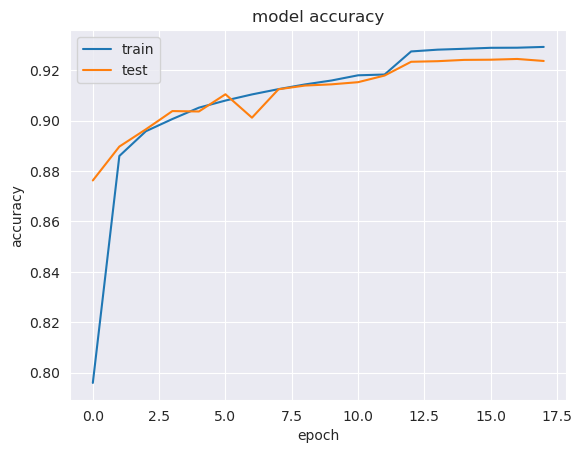

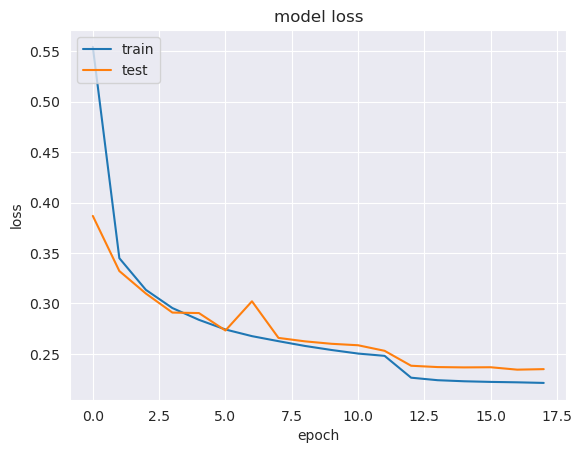

In [77]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## appliqués au dataset ptbdb

In [78]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                    min_delta = 0.01,
                    patience = 5,
                    verbose = 1,
                    mode = 'min',
                    restore_best_weights = True)

reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss',
                        min_delta = 0.01,
                        patience = 3,
                        factor = 0.1,
                        cooldown = 4,
                        verbose = 1)

In [79]:
X=df_i.iloc[:,:-1]
y=df_i.iloc[:,-1]
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [91]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=28)

In [92]:
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv1D, MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [97]:
batch_size = 32
epochs = 30

In [98]:
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [100]:
inputs = Input(shape = (X_train.shape[1],), name = "Input")
dense1 = Dense(units = 10, activation = "tanh", name = "dense1", kernel_initializer="normal")
dense2 = Dense(units = 8, activation = "tanh", name = "dense2", kernel_initializer="normal")
dense3 = Dense(units = 6, activation = "tanh", name = "dense3", kernel_initializer="normal")
dense4 = Dense(units = 2, activation = "softmax", name = "dense4", kernel_initializer="normal")

x = dense1(inputs)
x = dense2(x)
x = dense3(x)
outputs = dense4(x)

model_b = Model(inputs = inputs, outputs = outputs)
model_b.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 187)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 10)             │         1,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense3 (Dense)                  │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense4 (Dense)                  │ (None, 2)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,036 (7.95 KB)

 Trainable params: 2,036 (7.95 KB)

 Non-trainable params: 0 (0.00 B)

In [101]:
model_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [102]:
histo_dense = model_b.fit(X_train, y_train, epochs=epochs, validation_split = 0.2,callbacks=[early_stopping, reduce_learning_rate], batch_size=batch_size)

Epoch 1/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7174 - loss: 0.5970 - val_accuracy: 0.8344 - val_loss: 0.4331 - learning_rate: 0.0010
Epoch 2/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8433 - loss: 0.4179 - val_accuracy: 0.8652 - val_loss: 0.3766 - learning_rate: 0.0010
Epoch 3/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8681 - loss: 0.3705 - val_accuracy: 0.8782 - val_loss: 0.3395 - learning_rate: 0.0010
Epoch 4/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8865 - loss: 0.3245 - val_accuracy: 0.8826 - val_loss: 0.3119 - learning_rate: 0.0010
Epoch 5/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8965 - loss: 0.2933 - val_accuracy: 0.8839 - val_loss: 0.3024 - learning_rate: 0.0010
Epoch 6/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9026 - loss: 0.2773 - val_accuracy: 0.8896 - val_loss: 0.2933 - learning_rate: 0.0010
Epoch 7/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9098 - loss: 0.2584 - 

In [103]:
model_b.save('./model_dense_ptbdb.h5')

In [104]:
test_pred_class = model_b.predict(X_test).argmax(axis = 1)
rounded_labels_b=np.argmax(y_test, axis=1)
pd.crosstab(rounded_labels_b, test_pred_class, rownames = ["reel"], colnames = ["predict"])

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


predict,0,1
reel,,
0,2481,123
1,287,2362


# CONV_Net

## conv net apppliqué aux dataset mitbih

In [105]:
X=df_a.iloc[:,:-1]
y=df_a.iloc[:,-1]
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [106]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=28)

In [107]:
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv1D, MaxPooling1D, GlobalAveragePooling1D, BatchNormalization, SpatialDropout1D, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [108]:
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [109]:

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [110]:
X_train_cnn = np.reshape(X_sm, (X_sm.shape[0], X_sm.shape[1], 1))
X_test_cnn = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [116]:
print(X_train_cnn.shape, y_train.shape, X_test_cnn.shape, y_test.shape)


(452945, 187, 1) (339708, 5) (113237, 187, 1) (113237, 5)


In [112]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                    min_delta = 0.01,
                    patience = 5,
                    verbose = 1,
                    mode = 'min',
                    restore_best_weights = True)

reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss',
                        min_delta = 0.01,
                        patience = 3,
                        factor = 0.1,
                        cooldown = 4,
                        verbose = 1)

In [113]:
batch_size=32
verbose=1
epochs = 50

In [119]:
inputs = Input(shape = (X_sm.shape[1],1), name = "Input")
conv1_lenet = Conv1D(filters = 32, kernel_size = 5, padding = "valid", activation = "relu")
pool1_lenet = MaxPooling1D(pool_size = 2)
conv2_lenet = Conv1D(filters = 16, kernel_size = 3, padding = "valid", activation = "relu")
pool2_lenet = MaxPooling1D(pool_size = 2)
dropout_lenet = Dropout(rate=0.2)
flatten_lenet = Flatten()
dense1_lenet = Dense(units = 128, activation="relu")
dense2_lenet = Dense(units = 5, activation="softmax")

x = conv1_lenet(inputs)
x = pool1_lenet(x)
x = conv2_lenet(x)
x = pool2_lenet(x)
x = dropout_lenet(x)
x = flatten_lenet(x)
x = dense1_lenet(x)
outputs = dense2_lenet(x)


model_lenet = Model(inputs = inputs, outputs = outputs)
model_lenet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_1 = model_lenet.fit(X_train, y_train, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=32,validation_split = 0.2, verbose=1)
_, accuracy = model_lenet.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)

Epoch 1/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 108s 12ms/step - accuracy: 0.8851 - loss: 0.3157 - val_accuracy: 0.9758 - val_loss: 0.0747 - learning_rate: 0.0010
Epoch 2/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 102s 12ms/step - accuracy: 0.9702 - loss: 0.0866 - val_accuracy: 0.9851 - val_loss: 0.0459 - learning_rate: 0.0010
Epoch 3/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 108s 13ms/step - accuracy: 0.9790 - loss: 0.0600 - val_accuracy: 0.9875 - val_loss: 0.0390 - learning_rate: 0.0010
Epoch 4/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 104s 12ms/step - accuracy: 0.9840 - loss: 0.0469 - val_accuracy: 0.9891 - val_loss: 0.0343 - learning_rate: 0.0010
Epoch 5/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 90s 11ms/step - accuracy: 0.9864 - loss: 0.0408 - val_accuracy: 0.9910 - val_loss: 0.0312 - learning_rate: 0.0010
Epoch 6/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 91s 11ms/step - accuracy: 0.9874 - loss: 0.0363 - val_accuracy: 0.9931 - val_loss: 0.0235 - learning_rate: 0.0010
Epoch 7/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 98s 12ms/step - ac

In [120]:
accuracy


0.9927232265472412

In [121]:
pred_class_1 = model_lenet.predict(X_test).argmax(axis = 1)
rounded_labels_1=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_1, pred_class_1, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_1, pred_class_1))

3539/3539 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step
predict      0      1      2      3      4
reel                                      
0        22349    213     64    130     41
1          117  22615      1     12      1
2           65      5  22349    114     21
3           20      0      8  22390      0
4            7      2      2      1  22710
                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.98      1.00      0.99      0.99      0.98     22797
          1       0.99      0.99      1.00      0.99      1.00      0.99     22746
          2       1.00      0.99      1.00      0.99      1.00      0.99     22554
          3       0.99      1.00      1.00      0.99      1.00      1.00     22418
          4       1.00      1.00      1.00      1.00      1.00      1.00     22722

avg / total       0.99      0.99      1.00      0.99      1.00      0.99    113237


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


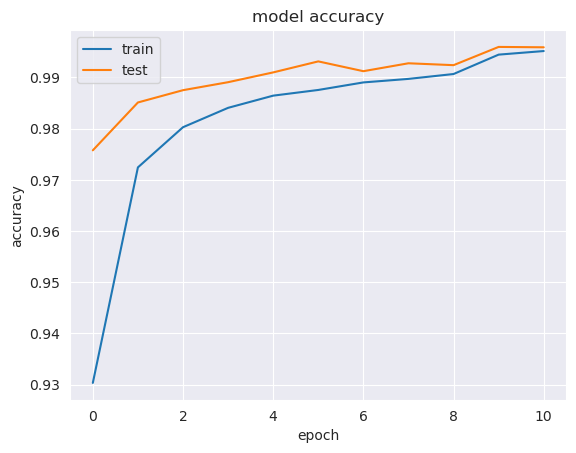

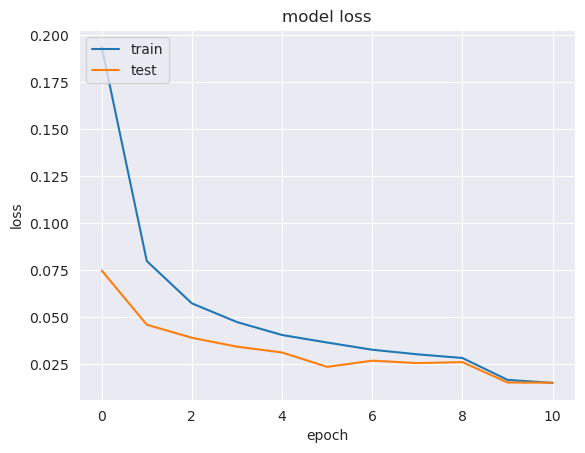

In [122]:
print(history_1.history.keys())
# summarize history for accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## conv net apppliqué aux dataset ptbdb

In [123]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score

In [144]:
X=df_i.iloc[:,:-1]
y=df_i.iloc[:,-1]
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [145]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=28)

In [146]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [147]:
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [148]:
y_train = to_categorical(y_train)

In [149]:
y_test = to_categorical(y_test)

In [150]:
X_train_cnn = np.reshape(X_train, (X_train.shape[0], X_sm.shape[1], 1))
X_test_cnn = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [151]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                    min_delta = 0.01,
                    patience = 5,
                    verbose = 1,
                    mode = 'min',
                    restore_best_weights = True)

reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss',
                        min_delta = 0.01,
                        patience = 3,
                        factor = 0.1,
                        cooldown = 4,
                        verbose = 1)

In [152]:
inputs = Input(shape = (X_sm.shape[1],1), name = "Input")
conv1_lenet = Conv1D(filters = 32, kernel_size = 5, padding = "valid", activation = "relu")
pool1_lenet = MaxPooling1D(pool_size = 2)
conv2_lenet = Conv1D(filters = 16, kernel_size = 3, padding = "valid", activation = "relu")
pool2_lenet = MaxPooling1D(pool_size = 2)
dropout_lenet = Dropout(rate=0.2)
flatten_lenet = Flatten()
dense1_lenet = Dense(units = 128, activation="relu")
dense2_lenet = Dense(units = 2, activation="softmax")

x = conv1_lenet(inputs)
x = pool1_lenet(x)
x = conv2_lenet(x)
x = pool2_lenet(x)
x = dropout_lenet(x)
x = flatten_lenet(x)
x = dense1_lenet(x)
outputs = dense2_lenet(x)


model_lenpt = Model(inputs = inputs, outputs = outputs)
model_lenpt.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_ptb = model_lenpt.fit(X_train, y_train, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=32,validation_split = 0.2, verbose=1)
_, mse, accuracy = model_lenpt.evaluate(X_test_cnn, y_test, batch_size=batch_size, verbose=1)

Epoch 1/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7815 - loss: 0.4627 - val_accuracy: 0.8959 - val_loss: 0.2588 - learning_rate: 0.0010
Epoch 2/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8930 - loss: 0.2685 - val_accuracy: 0.9470 - val_loss: 0.1674 - learning_rate: 0.0010
Epoch 3/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9328 - loss: 0.1763 - val_accuracy: 0.9553 - val_loss: 0.1289 - learning_rate: 0.0010
Epoch 4/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9509 - loss: 0.1328 - val_accuracy: 0.9740 - val_loss: 0.0894 - learning_rate: 0.0010
Epoch 5/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9584 - loss: 0.1122 - val_accuracy: 0.9772 - val_loss: 0.0774 - learning_rate: 0.0010
Epoch 6/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9686 - loss: 0.0880 - val_accuracy: 0.9813 - val_loss: 0.0625 - learning_rate: 0.0010
Epoch 7/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9738 - loss: 0.0

ValueError: as_list() is not defined on an unknown TensorShape.

In [153]:
print('accuracy:', accuracy)

pred_class_9 = model_lenpt.predict(X_test).argmax(axis = 1)
rounded_labels_9=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_9, pred_class_9, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_9, pred_class_9))


accuracy: 0.9927232265472412
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
predict     0     1
reel               
0        2583    21
1          32  2617
                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.99      0.99      0.99      0.99      0.98      2604
          1       0.99      0.99      0.99      0.99      0.99      0.98      2649

avg / total       0.99      0.99      0.99      0.99      0.99      0.98      5253


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


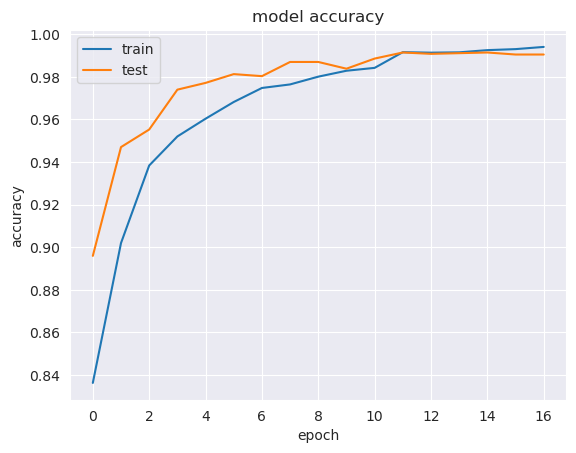

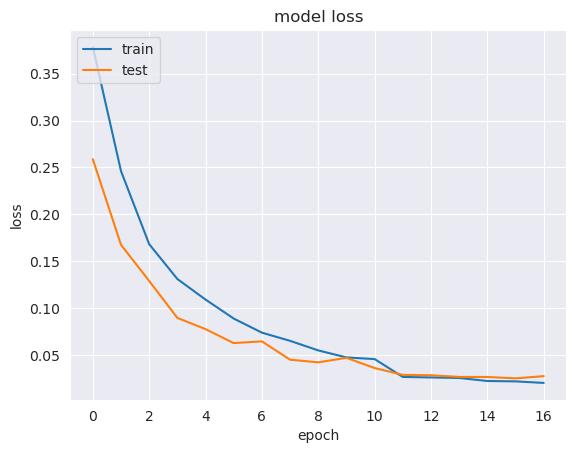

In [154]:
print(history_ptb.history.keys())
# summarize history for accuracy
plt.plot(history_ptb.history['accuracy'])
plt.plot(history_ptb.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_ptb.history['loss'])
plt.plot(history_ptb.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Réseau de Neurones Convolutifs

## appliqué au dataset mitibih

## Reseau convolutif. Données augmentée avec les proéminences des pics en valeurs numériques

In [155]:
X=df_a.iloc[:,:-1]
x_state=X
y=df_a.iloc[:,-1]

In [156]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [157]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)


In [158]:
def distrib_proeminence(df):
    prominences = []
    for i in range (len(df)):
        x=df.iloc[i,:]
        peaks, _ = signal.find_peaks(x)
        pro=signal.peak_prominences(x, peaks)[0]
        prominences.append(pro)
    pro_S = pd.DataFrame(prominences)
    return pro_S

In [159]:
df_proem = distrib_proeminence(X_sm)
#df_drop_last = df_proem_test_train.iloc[:,-1]
df_proem = df_proem.add_prefix('pro_')
#df = pd.concat([df,pro_S], axis =1)
X_sm = pd.concat([X_sm,df_proem], axis =1)

In [160]:
X_sm.info()
def format_col(df):
    list_int= [i for i in range(len(df.columns))]
    df.columns=list_int
    return df
format_col(X)
X=X.fillna(-0.15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452945 entries, 0 to 452944
Columns: 275 entries, 0 to pro_87
dtypes: float64(275)
memory usage: 950.3 MB


In [161]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=28)

In [162]:
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv1D, MaxPooling1D, GlobalAveragePooling1D, BatchNormalization, SpatialDropout1D, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [165]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
X_train_cnn = np.reshape(X_sm, (X_sm.shape[0], X_sm.shape[1], 1))
X_test_cnn = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                    min_delta = 0.01,
                    patience = 5,
                    verbose = 1,
                    mode = 'min',
                    restore_best_weights = True)

reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss',
                        min_delta = 0.01,
                        patience = 3,
                        factor = 0.1,
                        cooldown = 4,
                        verbose = 1)

In [ ]:
verbose, epochs, batch_size = 1, 50 , 32
n_timesteps, n_features, n_outputs =  X_train_cnn.shape[1],X_train_cnn.shape[2], y_sm.shape[1]
model_a = Sequential()
model_a.add(Conv1D(filters=64, kernel_size=5, activation='relu',input_shape=(n_timesteps,n_features)))
model_a.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_a.add(BatchNormalization())
model_a.add(MaxPooling1D(pool_size=2))
model_a.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
model_a.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model_a.add(BatchNormalization())
model_a.add(MaxPooling1D(pool_size=2))
model_a.add(Conv1D(filters=16, kernel_size=5, activation='relu'))
model_a.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model_a.add(BatchNormalization())
model_a.add(MaxPooling1D(pool_size=2))
model_a.add(Flatten())
model_a.add(Dense(125, activation='relu'))
model_a.add(Dense(n_outputs, activation='softmax'))
model_a.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_a = model_a.fit(X_sm, y_sm, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=batch_size,validation_split = 0.2, verbose=verbose)
model_a.save('/content/drive/MyDrive/heart_peak/model_mycnn_mitbih_2.h5')
_, accuracy = model_a.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)

In [ ]:
print('accuracy',accuracy )

pred_class_a = model_a.predict(X_test).argmax(axis = 1)
rounded_labels_a=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_a, pred_class_a, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_a, pred_class_a))

In [ ]:
print(history_a.history.keys())
# summarize history for accuracy
plt.plot(history_a.history['accuracy'])
plt.plot(history_a.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/MyDrive/heart_peak/acc_model_a')
plt.show()
# summarize history for loss
plt.plot(history_a.history['loss'])
plt.plot(history_a.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/MyDrive/heart_peak/loss_model_a')
plt.show()

## Section sans augmentation d'information, recherche du meilleur modèle travaux préliminaire sans ajout de proéminences

In [166]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score

In [167]:
X=df_a.iloc[:,:-1]
x_state=X
y=df_a.iloc[:,-1]
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=28)

In [168]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=28)

In [169]:
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv1D, MaxPooling1D, GlobalAveragePooling1D, BatchNormalization, SpatialDropout1D, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [170]:
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [171]:
y_train = to_categorical(y_train)

In [172]:
y_test = to_categorical(y_test)

In [173]:
X_train_cnn = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [174]:
print(X_train_cnn.shape, y_train.shape, X_test_cnn.shape, y_test.shape)


(339708, 187, 1) (339708, 5) (113237, 187, 1) (113237, 5)


In [175]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                    min_delta = 0.01,
                    patience = 5,
                    verbose = 1,
                    mode = 'min',
                    restore_best_weights = True)

reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss',
                        min_delta = 0.01,
                        patience = 3,
                        factor = 0.1,
                        cooldown = 4,
                        verbose = 1)

In [176]:
verbose, epochs, batch_size = 1, 50 , 32
n_timesteps, n_features, n_outputs =  X_train_cnn.shape[1],X_train_cnn.shape[2], y_train.shape[1]
model1 = Sequential()
model1.add(Conv1D(filters=128, kernel_size=5, activation='relu',input_shape=(n_timesteps,n_features)))
model1.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling1D(pool_size=2))
model1.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model1.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling1D(pool_size=2))
model1.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling1D(pool_size=2))
model1.add(Conv1D(filters=16, kernel_size=5, activation='relu'))
model1.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(125, activation='relu'))
model1.add(Dense(n_outputs, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_1 = model1.fit(X_train, y_train, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=batch_size,validation_split = 0.2, verbose=verbose)
model1.save('./model_mycnn_mitbih_modelbest_128.h5')
_, accuracy = model1.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)

/home/blackswan/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 651s 76ms/step - accuracy: 0.8892 - loss: 0.3063 - val_accuracy: 0.9610 - val_loss: 0.1132 - learning_rate: 0.0010
Epoch 2/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 660s 78ms/step - accuracy: 0.9657 - loss: 0.0999 - val_accuracy: 0.9723 - val_loss: 0.0817 - learning_rate: 0.0010
Epoch 3/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 648s 76ms/step - accuracy: 0.9779 - loss: 0.0652 - val_accuracy: 0.9839 - val_loss: 0.0500 - learning_rate: 0.0010
Epoch 4/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 630s 74ms/step - accuracy: 0.9834 - loss: 0.0485 - val_accuracy: 0.9841 - val_loss: 0.0501 - learning_rate: 0.0010
Epoch 5/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 644s 76ms/step - accuracy: 0.9866 - loss: 0.0402 - val_accuracy: 0.9868 - val_loss: 0.0397 - learning_rate: 0.0010
Epoch 6/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 643s 76ms/step - accuracy: 0.9887 - loss: 0.0335 - val_accuracy: 0.9873 - val_loss: 0.0389 - learning_rate: 0.0010
Epoch 7/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 621s 73ms/step -

KeyboardInterrupt: 

In [ ]:
print('accuracy:',accuracy)

pred_class_1 = model1.predict(X_test).argmax(axis = 1)
rounded_labels_1=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_1, pred_class_1, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_1, pred_class_1))

In [ ]:
print(history_1.history.keys())
# summarize history for accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 256


In [ ]:
verbose, epochs, batch_size = 1, 50 , 32
n_timesteps, n_features, n_outputs =  X_train_cnn.shape[1],X_train_cnn.shape[2], y_train.shape[1]
modelb = Sequential()
modelb.add(Conv1D(filters=256, kernel_size=5, activation='relu',input_shape=(n_timesteps,n_features)))
modelb.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
modelb.add(BatchNormalization())
modelb.add(MaxPooling1D(pool_size=2))
modelb.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
modelb.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
modelb.add(BatchNormalization())
modelb.add(MaxPooling1D(pool_size=2))
modelb.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
modelb.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
modelb.add(BatchNormalization())
modelb.add(MaxPooling1D(pool_size=2))
modelb.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
modelb.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
modelb.add(BatchNormalization())
modelb.add(MaxPooling1D(pool_size=2))
modelb.add(Flatten())
modelb.add(Dense(125, activation='relu'))
modelb.add(Dense(5, activation='softmax'))
modelb.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_b = modelb.fit(X_train, y_train, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=batch_size,validation_split = 0.2, verbose=verbose)
modelb.save('/content/drive/MyDrive/heart_peak/model_mycnn_mitbih_modelbest_256.h5')
_, accuracy = modelb.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)

In [ ]:
print('accuracy:', accuracy)

pred_classb = modelb.predict(X_test).argmax(axis = 1)
rounded_labelsb=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labelsb, pred_classb, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labelsb, pred_classb))

In [ ]:
print(history_b.history.keys())
# summarize history for accuracy
plt.plot(history_b.history['accuracy'])
plt.plot(history_b.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_b.history['loss'])
plt.plot(history_b.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
verbose, epochs, batch_size = 1, 50 , 32
n_timesteps, n_features, n_outputs =  X_train_cnn.shape[1],X_train_cnn.shape[2], y_sm.shape[1]
model2 = Sequential()
model2.add(Conv1D(filters=128, kernel_size=3, activation='relu',input_shape=(n_timesteps,n_features)))
model2.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling1D(pool_size=2))
model2.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model2.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling1D(pool_size=2))
model2.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model2.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling1D(pool_size=2))
model2.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model2.add(Conv1D(filters=16, kernel_size=5, activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
model2.add(Dense(125, activation='relu'))
model2.add(Dense(n_outputs, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_2 = model2.fit(X_train, y_train, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=batch_size,validation_split = 0.2, verbose=verbose)
_, accuracy = model2.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)

In [ ]:
print('accuracy:', accuracy)

pred_class_2 = model2.predict(X_test).argmax(axis = 1)
rounded_labels_2=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_2, pred_class_2, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_2, pred_class_2))

In [ ]:
print(history_2.history.keys())
# summarize history for accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [177]:
verbose, epochs, batch_size = 1, 50 , 32
n_timesteps, n_features, n_outputs =  X_train_cnn.shape[1],X_train_cnn.shape[2], y_train.shape[1]
model3 = Sequential()
model3.add(Conv1D(filters=64, kernel_size=5, activation='relu',input_shape=(n_timesteps,n_features)))
model3.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling1D(pool_size=2))
model3.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling1D(pool_size=2))
model3.add(Conv1D(filters=16, kernel_size=5, activation='relu'))
model3.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(125, activation='relu'))
model3.add(Dense(n_outputs, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_3 = model3.fit(X_train, y_train, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=batch_size,validation_split = 0.2, verbose=verbose)
_, accuracy = model3.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)

/home/blackswan/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 299s 34ms/step - accuracy: 0.9157 - loss: 0.2391 - val_accuracy: 0.9647 - val_loss: 0.1031 - learning_rate: 0.0010
Epoch 2/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 252s 30ms/step - accuracy: 0.9776 - loss: 0.0668 - val_accuracy: 0.9844 - val_loss: 0.0489 - learning_rate: 0.0010
Epoch 3/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 265s 31ms/step - accuracy: 0.9850 - loss: 0.0440 - val_accuracy: 0.9869 - val_loss: 0.0411 - learning_rate: 0.0010
Epoch 4/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 299s 35ms/step - accuracy: 0.9886 - loss: 0.0341 - val_accuracy: 0.9858 - val_loss: 0.0428 - learning_rate: 0.0010
Epoch 5/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9910 - loss: 0.0273
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 289s 34ms/step - accuracy: 0.9910 - loss: 0.0273 - val_accuracy: 0.9865 - val_loss: 0.0436 - learning_rate: 0.0010
Epoch 5: early stopping
Restoring model weights from the end

In [178]:
model3.save('./model3.h5')

In [179]:
print('accuracy:',accuracy)

pred_class_3 = model3.predict(X_test).argmax(axis = 1)
rounded_labels_3=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_3, pred_class_3, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_3, pred_class_3))

accuracy: 0.9652851819992065
3539/3539 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step
predict      0      1      2      3      4
reel                                      
0        21440    633    128    498     98
1         1055  21519    117     43     12
2          265    147  21521    510    111
3           54     36     74  22254      0
4           54     27     63      6  22572
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.94      0.98      0.94      0.96      0.92     22797
          1       0.96      0.95      0.99      0.95      0.97      0.93     22746
          2       0.98      0.95      1.00      0.97      0.97      0.95     22554
          3       0.95      0.99      0.99      0.97      0.99      0.98     22418
          4       0.99      0.99      1.00      0.99      1.00      0.99     22722

avg / total       0.97      0.97      0.99      0.97      0.98      0.95    113237


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


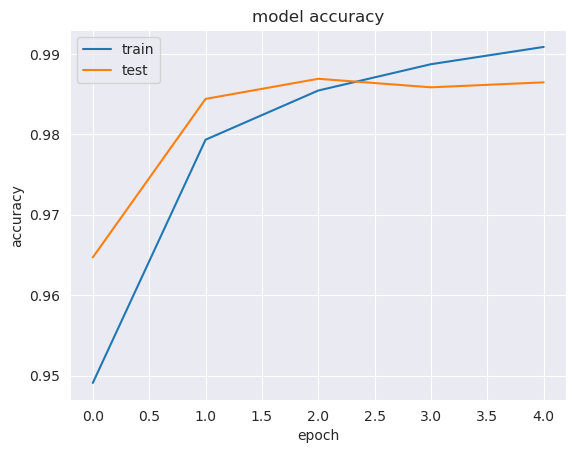

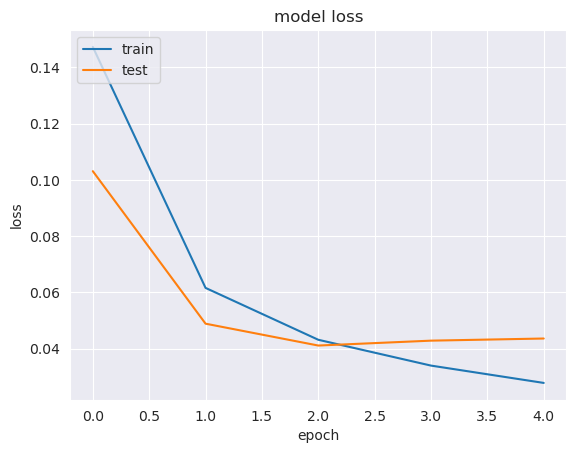

In [180]:
print(history_3.history.keys())
# summarize history for accuracy
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                    min_delta = 0.01,
                    patience = 20,
                    verbose = 1,
                    mode = 'min',
                    restore_best_weights = True)

reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss',
                        min_delta = 0.01,
                        patience = 3,
                        factor = 0.1,
                        cooldown = 4,
                        verbose = 1)

In [ ]:
verbose, epochs, batch_size = 1, 50 , 32
n_timesteps, n_features, n_outputs =  X_train_cnn.shape[1],X_train_cnn.shape[2], y_sm.shape[1]
model4 = Sequential()
model4.add(Conv1D(filters=64, kernel_size=5, activation='relu',input_shape=(n_timesteps,n_features)))
model4.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling1D(pool_size=2))
model4.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
model4.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling1D(pool_size=2))
model4.add(Conv1D(filters=16, kernel_size=5, activation='relu'))
model4.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling1D(pool_size=2))
model4.add(Flatten())
model4.add(Dense(125, activation='relu'))
model4.add(Dense(n_outputs, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_4 = model4.fit(X_train, y_train, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=batch_size,validation_split = 0.2, verbose=verbose)
model4.save('./model4.h5')

In [ ]:
_, accuracy = model4.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)

In [ ]:
print('accuracy:', accuracy )

pred_class_4 = model4.predict(X_test).argmax(axis = 1)
rounded_labels_4=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_4, pred_class_4, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_4, pred_class_4))

In [ ]:
print(history_4.history.keys())
# summarize history for accuracy
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [181]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                    min_delta = 0.01,
                    patience = 10,
                    verbose = 1,
                    mode = 'min',
                    restore_best_weights = True)

reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss',
                        min_delta = 0.01,
                        patience = 3,
                        factor = 0.1,
                        cooldown = 4,
                        verbose = 1)

In [182]:
verbose, epochs, batch_size = 1, 50 , 32
n_timesteps, n_features, n_outputs =  X_train_cnn.shape[1],X_train_cnn.shape[2], y_train.shape[1]
model5 = Sequential()
model5.add(Conv1D(filters=32, kernel_size=5, activation='relu',input_shape=(n_timesteps,n_features)))
model5.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling1D(pool_size=2))
model5.add(Conv1D(filters=16, kernel_size=5, activation='relu'))
model5.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling1D(pool_size=2))
model5.add(Flatten())
model5.add(Dense(125, activation='relu'))
model5.add(Dense(n_outputs, activation='softmax'))
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_5 = model5.fit(X_train, y_train, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=batch_size,validation_split = 0.2, verbose=verbose)
_, accuracy = model5.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)
model5.save('./model5.h5')

/home/blackswan/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 203s 24ms/step - accuracy: 0.9312 - loss: 0.2002 - val_accuracy: 0.9749 - val_loss: 0.0690 - learning_rate: 0.0010
Epoch 2/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 151s 18ms/step - accuracy: 0.9856 - loss: 0.0439 - val_accuracy: 0.9877 - val_loss: 0.0373 - learning_rate: 0.0010
Epoch 3/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 148s 17ms/step - accuracy: 0.9905 - loss: 0.0286 - val_accuracy: 0.9925 - val_loss: 0.0244 - learning_rate: 0.0010
Epoch 4/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 169s 20ms/step - accuracy: 0.9933 - loss: 0.0210 - val_accuracy: 0.9852 - val_loss: 0.0443 - learning_rate: 0.0010
Epoch 5/50
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 156s 18ms/step - accuracy: 0.9946 - loss: 0.0168 - val_accuracy: 0.9904 - val_loss: 0.0298 - learning_rate: 0.0010
Epoch 6/50
8491/8493 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9955 - loss: 0.0139
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
8493/8493 ━━━━━━━━━━━━━━━━━━━━ 143s 17ms/step - a

In [183]:
print('accuracy:', accuracy )

pred_class_5 = model5.predict(X_test).argmax(axis = 1)
rounded_labels_5=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_5, pred_class_5, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_5, pred_class_5))

accuracy: 0.9975361227989197
3539/3539 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step
predict      0      1      2      3      4
reel                                      
0        22571    105     63     41     17
1           12  22730      3      1      0
2            8      2  22525     18      1
3            0      0      0  22418      0
4            7      0      1      0  22714
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      1.00      0.99      0.99      0.99     22797
          1       1.00      1.00      1.00      1.00      1.00      1.00     22746
          2       1.00      1.00      1.00      1.00      1.00      1.00     22554
          3       1.00      1.00      1.00      1.00      1.00      1.00     22418
          4       1.00      1.00      1.00      1.00      1.00      1.00     22722

avg / total       1.00      1.00      1.00      1.00      1.00      1.00    113237


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


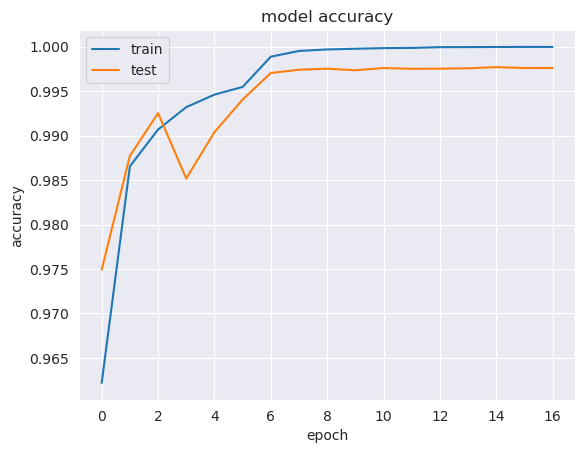

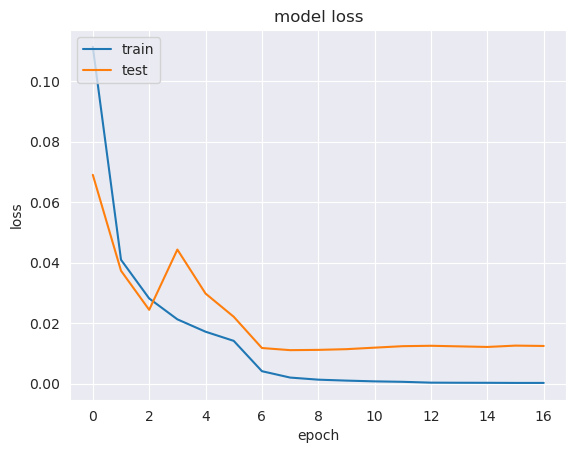

In [184]:
print(history_5.history.keys())
# summarize history for accuracy
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [185]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                    min_delta = 0.01,
                    patience = 5,
                    verbose = 1,
                    mode = 'min',
                    restore_best_weights = True)

reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss',
                        min_delta = 0.01,
                        patience = 3,
                        factor = 0.1,
                        cooldown = 4,
                        verbose = 1)

In [ ]:
verbose, epochs, batch_size = 1, 50 , 32
n_timesteps, n_features, n_outputs =  X_train_cnn.shape[1],X_train_cnn.shape[2], y_sm.shape[1]
model6 = Sequential()
model6.add(Conv1D(filters=32, kernel_size=5, activation='relu',input_shape=(n_timesteps,n_features)))
model6.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling1D(pool_size=2))
model6.add(Conv1D(filters=16, kernel_size=5, activation='relu'))
model6.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling1D(pool_size=2))
model6.add(Flatten())
model6.add(Dense(125, activation='relu'))
model6.add(Dense(n_outputs, activation='softmax'))
model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_6 = model6.fit(X_train, y_train, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=batch_size,validation_split = 0.2, verbose=verbose)
_, accuracy = model6.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)

In [ ]:
print('accuracy:', accuracy )

pred_class_6 = model6.predict(X_test).argmax(axis = 1)
rounded_labels_6=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_6, pred_class_6, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_6, pred_class_6))

In [ ]:
print(history_6.history.keys())
# summarize history for accuracy
plt.plot(history_6.history['accuracy'])
plt.plot(history_6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
verbose, epochs, batch_size = 1, 50 , 32
n_timesteps, n_features, n_outputs =  X_train_cnn.shape[1],X_train_cnn.shape[2], y_sm.shape[1]
model7 = Sequential()
model7.add(Conv1D(filters=32, kernel_size=5, activation='relu',input_shape=(n_timesteps,n_features)))
model7.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model7.add(BatchNormalization())
model7.add(MaxPooling1D(pool_size=2))
model7.add(Conv1D(filters=16, kernel_size=5, activation='relu'))
model7.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model7.add(BatchNormalization())
model7.add(MaxPooling1D(pool_size=2))
model7.add(Flatten())
model7.add(Dense(125, activation='relu'))
model7.add(Dense(n_outputs, activation='softmax'))
model7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_7 = model7.fit(X_train, y_train, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=batch_size,validation_split = 0.2, verbose=verbose)
_, accuracy= model7.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)
model7.save('/content/drive/MyDrive/heart_peak/model7')

In [ ]:
print('mae',  mae, accuracy )

pred_class_7 = model7.predict(X_test).argmax(axis = 1)
rounded_labels_7=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_7, pred_class_7, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_7, pred_class_7))

In [ ]:
print(history_7.history.keys())
# summarize history for accuracy
plt.plot(history_7.history['accuracy'])
plt.plot(history_7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy_model_anomalie')
plt.show()
# summarize history for loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss_model_anomalie')
plt.show()

## appliqué au dataset ptbdb meilleur modèle

In [186]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score

In [187]:
X=df_i.iloc[:,:-1]
y=df_i.iloc[:,-1]
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [188]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=28)

In [189]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [190]:
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [191]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
X_train_cnn = np.reshape(X_sm, (X_sm.shape[0], X_sm.shape[1], 1))
X_test_cnn = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [192]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                    min_delta = 0.01,
                    patience = 10,
                    verbose = 1,
                    mode = 'min',
                    restore_best_weights = True)

reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss',
                        min_delta = 0.01,
                        patience = 3,
                        factor = 0.1,
                        cooldown = 4,
                        verbose = 1)

In [195]:
verbose, epochs, batch_size = 1, 50 , 32
n_timesteps, n_features, n_outputs =  X_train_cnn.shape[1],X_train_cnn.shape[2], y_train.shape[1]
model_11 = Sequential()
model_11.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model_11.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_11.add(Dropout(0.5))
model_11.add(MaxPooling1D(pool_size=2))
model_11.add(Flatten())
model_11.add(Dense(100, activation='relu'))
model_11.add(Dense(2, activation='softmax'))
model_11.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_11=model_11.fit(X_train, y_train, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=batch_size,validation_split = 0.2, verbose=verbose)
model_11.save('./model_mycnn_mitbih_2.h5')


/home/blackswan/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.8168 - loss: 0.4125 - val_accuracy: 0.9004 - val_loss: 0.2527 - learning_rate: 0.0010
Epoch 2/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9339 - loss: 0.1762 - val_accuracy: 0.9540 - val_loss: 0.1346 - learning_rate: 0.0010
Epoch 3/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9631 - loss: 0.0987 - val_accuracy: 0.9680 - val_loss: 0.0987 - learning_rate: 0.0010
Epoch 4/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9759 - loss: 0.0705 - val_accuracy: 0.9819 - val_loss: 0.0569 - learning_rate: 0.0010
Epoch 5/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9830 - loss: 0.0519 - val_accuracy: 0.9803 - val_loss: 0.0602 - learning_rate: 0.0010
Epoch 6/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9873 - loss: 0.0422 - val_accuracy: 0.9883 - val_loss: 0.0458 - learning_rate: 0.0010
Epoch 7/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9893 - loss: 0

In [196]:
_, accuracy = model_11.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)

165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9903 - loss: 0.0308


In [197]:
print(' accuracy', accuracy )

pred_class_11 = model_11.predict(X_test).argmax(axis = 1)
rounded_labels_11=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_11, pred_class_11, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_11, pred_class_11))

 accuracy 0.9906719923019409
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
predict     0     1
reel               
0        2574    30
1          19  2630
                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.99      0.99      0.99      0.99      0.98      2604
          1       0.99      0.99      0.99      0.99      0.99      0.98      2649

avg / total       0.99      0.99      0.99      0.99      0.99      0.98      5253


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


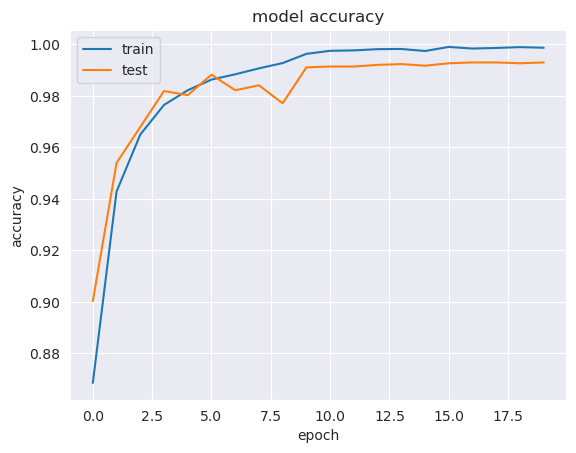

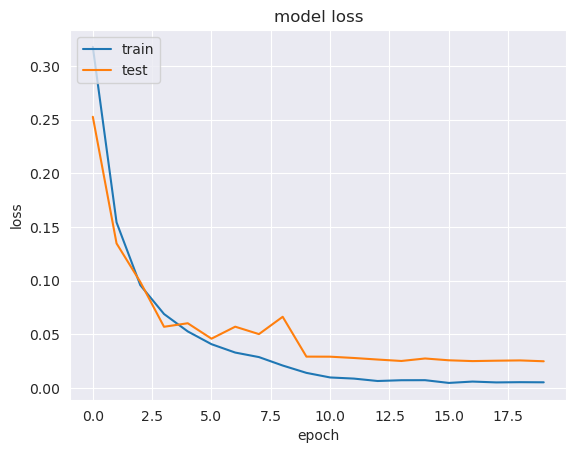

In [198]:
print(history_11.history.keys())
# summarize history for accuracy
plt.plot(history_11.history['accuracy'])
plt.plot(history_11.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('./acc_model_ptb.png')
plt.show()
# summarize history for loss
plt.plot(history_11.history['loss'])
plt.plot(history_11.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('./loss_model_ptb.png')
plt.show()

# *pipeline de transformation markov image pour conv2D*

In [199]:
!pip install pyts

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 47.6 MB/s eta 0:00:00a 0:00:01


In [200]:
import pandas as pd
from scipy import signal
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from pyts.image import GramianAngularField
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling1D, BatchNormalization, SpatialDropout1D, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import keras
from PIL import Image
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score

In [201]:
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler


In [202]:
X=df_a.iloc[:,:-1]
y=df_a.iloc[:,-1]

In [203]:
smote = SMOTE()

In [204]:
X_rs, y_rs = smote.fit_resample(X, y)

In [205]:
y_rs.shape


(452945,)

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X_rs, y_rs, test_size=0.20, random_state=321)

In [207]:
X_train.shape

(362356, 187)

In [208]:
y_train = to_categorical(y_train, 5)
y_test = to_categorical(y_test, 5)

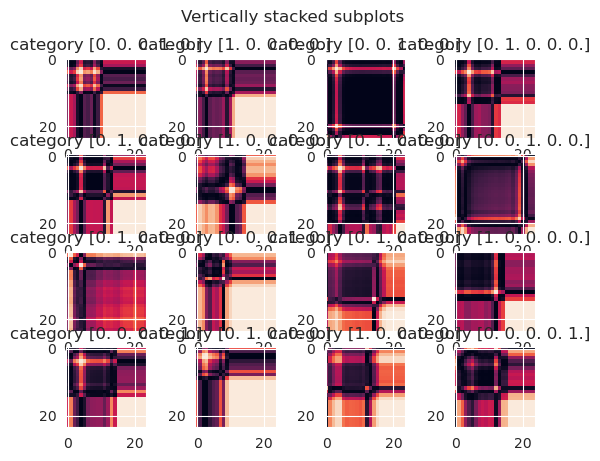

In [213]:
gaf = GramianAngularField(image_size=24)
im_train = gaf.fit_transform(X_train)
im_test = gaf.transform(X_test)

# plot one image
fig, axs = plt.subplots(4,4)
fig.suptitle('Vertically stacked subplots')
axs[0][0].imshow(im_test[0])
axs[0][0].set_title(f'category {y_test[0]}')
axs[0][1].imshow(im_test[10000])
axs[0][1].set_title(f'category {y_test[10000]}')
axs[0][2].imshow(im_test[30000])
axs[0][2].set_title(f'category {y_test[30000]}')
axs[0][3].imshow(im_test[40000])
axs[0][3].set_title(f'category {y_test[40000]}')
axs[1][0].imshow(im_test[50000])
axs[1][0].set_title(f'category {y_test[50000]}')
axs[1][1].imshow(im_test[60000])
axs[1][1].set_title(f'category {y_test[60000]}')
axs[1][2].imshow(im_test[70000])
axs[1][2].set_title(f'category {y_test[70000]}')
axs[1][3].imshow(im_test[80000])
axs[1][3].set_title(f'category {y_test[80000]}')
axs[2][0].imshow(im_test[90000])
axs[2][0].set_title(f'category {y_test[90000]}')
axs[2][1].imshow(im_test[30001])
axs[2][1].set_title(f'category {y_test[30001]}')
axs[2][2].imshow(im_test[40001])
axs[2][2].set_title(f'category {y_test[40001]}')
axs[2][3].imshow(im_test[50001])
axs[2][3].set_title(f'category {y_test[50001]}')
axs[3][0].imshow(im_test[60001])
axs[3][0].set_title(f'category {y_test[60001]}')
axs[3][1].imshow(im_test[70001])
axs[3][1].set_title(f'category {y_test[70001]}')
axs[3][2].imshow(im_test[80001])
axs[3][2].set_title(f'category {y_test[80001]}')
axs[3][3].imshow(im_test[90001])
axs[3][3].set_title(f'category {y_test[90001]}')
plt.show()


In [214]:
im_train.shape

(362356, 24, 24)

In [215]:
im_test.shape

(90589, 24, 24)

In [216]:
def standardize(image_data):
        image_data -= np.mean(image_data, axis=0)
        image_data /= np.std(image_data, axis=0)
        return image_data

In [217]:
im_train = standardize(im_train)

In [218]:
im_train.shape

(362356, 24, 24)

In [219]:
im_test = standardize(im_test)

In [220]:
HEIGHT=12
WIDTH=16

In [221]:
BATCH_SIZE = 32

In [222]:
channels=3

In [223]:
im_train= im_train.reshape(im_train.shape[0],HEIGHT,WIDTH,channels)
im_test= im_test.reshape(im_test.shape[0],HEIGHT,WIDTH,channels)
im_train.shape

(362356, 12, 16, 3)

In [224]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                    min_delta = 0.01,
                    patience = 5,
                    verbose = 1,
                    mode = 'min',
                    restore_best_weights = True)

reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss',
                        min_delta = 0.01,
                        patience = 3,
                        factor = 0.1,
                        cooldown = 4,
                        verbose = 1)

In [ ]:
verbose, epochs, batch_size = 1, 50 ,64
model=Sequential()
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(32, (5, 5), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(64, (5, 5), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(128, (5, 5), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(125, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_a = model.fit(im_train, y_train, epochs=epochs,callbacks=[reduce_learning_rate, early_stopping],
                      batch_size=batch_size,validation_data=(im_test, y_test), verbose=verbose)

m_, accuracy = model.evaluate(im_test, y_test, batch_size=batch_size, verbose=verbose)
accuracy

Epoch 1/50
5662/5662 ━━━━━━━━━━━━━━━━━━━━ 620s 109ms/step - accuracy: 0.8892 - loss: 0.3024 - val_accuracy: 0.9642 - val_loss: 0.1077 - learning_rate: 0.0010
Epoch 2/50
3320/5662 ━━━━━━━━━━━━━━━━━━━━ 3:50 98ms/step - accuracy: 0.9684 - loss: 0.0923

In [ ]:
model.save('./model_mycnn_markov.h5')

In [ ]:
model_b= keras.models.load_model('./model_mycnn_markov.h5')
pred_class_a = model_b.predict(im_test).argmax(axis = 1)
rounded_labels_a=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_a, pred_class_a, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_a, pred_class_a))


In [ ]:
print(history_a.history.keys())
# summarize history for accuracy
plt.plot(history_a.history['accuracy'])
plt.plot(history_a.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('./acc_model_markov.png')
plt.show()
# summarize history for loss
plt.plot(history_a.history['loss'])
plt.plot(history_a.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('./loss_model_markov.png')
plt.show()